In [27]:
!pip install keras-metrics
!pip install pandas

In [28]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten , Dense , Conv2D , MaxPool2D ,  Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
from keras.preprocessing import image
from tensorflow.keras.models import Model
import PIL
import PIL.Image
from PIL import Image
import cv2
from numpy import asarray
import numpy
import pandas as pd

import keras_metrics
print(tf.__version__)

2.9.0


In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [30]:
img_width = 64
img_height = 64

In [31]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.4)



In [32]:
train_data_generator = datagen.flow_from_directory(directory='C:/Users/TUSHAR/malaria/cell_images',
                          target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   
                                                   )            

Found 16536 images belonging to 2 classes.


In [33]:
validation_data_generator = datagen.flow_from_directory(directory='C:/Users/TUSHAR/malaria/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   
                                                   )

Found 11022 images belonging to 2 classes.


Parasitized Cell :


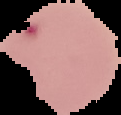

In [34]:
path1 = "C:/Users/TUSHAR/malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144823_cell_162.png"
Load_image1 = tf.keras.preprocessing.image.load_img(path1)
print("Parasitized Cell :")
Load_image1



Uninfected Cell :


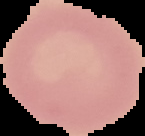

In [35]:
path2 = "C:/Users/TUSHAR/malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png"
print("Uninfected Cell :")
Load_image2 = tf.keras.preprocessing.image.load_img(path2)
Load_image2

In [36]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1])

# CNN model

In [37]:
model = Sequential()

model.add(Conv2D(64,(8,8), input_shape = (img_width,img_height,3), activation = "relu"))
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))
model.add(Conv2D(32,(4,4), activation = "relu"))
model.add(MaxPool2D(2,2))
# model.add(Dropout(0.2))
model.add(Conv2D(8,(2,2), activation = "relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 57, 57, 64)        12352     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        32800     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 8)         1032      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 8)         

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy",tf.keras.metrics.AUC(),
          tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.FalseNegatives(),
          tf.keras.metrics.FalsePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.TruePositives()])


In [39]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 15,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/15


C:\Users\TUSHAR\AppData\Local\Temp/ipykernel_26844/2835613124.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


1034/1034 [==============================] - 75s 71ms/step - loss: 0.6909 - accuracy: 0.5304 - auc_2: 0.5477 - precision_2: 0.5292 - recall_2: 0.5501 - false_negatives_2: 3720.0000 - false_positives_2: 4046.0000 - true_negatives_2: 4222.0000 - true_positives_2: 4548.0000 - val_loss: 0.6898 - val_accuracy: 0.5341 - val_auc_2: 0.5866 - val_precision_2: 0.5220 - val_recall_2: 0.8084 - val_false_negatives_2: 1056.0000 - val_false_positives_2: 4079.0000 - val_true_negatives_2: 1432.0000 - val_true_positives_2: 4455.0000
Epoch 2/15
1034/1034 [==============================] - 70s 68ms/step - loss: 0.4478 - accuracy: 0.7978 - auc_2: 0.8769 - precision_2: 0.7671 - recall_2: 0.8553 - false_negatives_2: 1196.0000 - false_positives_2: 2147.0000 - true_negatives_2: 6121.0000 - true_positives_2: 7072.0000 - val_loss: 0.2604 - val_accuracy: 0.9036 - val_auc_2: 0.9614 - val_precision_2: 0.8760 - val_recall_2: 0.9405 - val_false_negatives_2: 328.0000 - val_false_positives_2: 734.0000 - val_true_negati

In [40]:
history.history

{'loss': [0.6909405589103699,
  0.4477909803390503,
  0.25147441029548645,
  0.22327058017253876,
  0.20785389840602875,
  0.20263883471488953,
  0.19363988935947418,
  0.1874086707830429,
  0.18043053150177002,
  0.17564402520656586,
  0.17570514976978302,
  0.17303292453289032,
  0.16945035755634308,
  0.16563823819160461,
  0.1626676321029663],
 'accuracy': [0.5303580164909363,
  0.7978350520133972,
  0.9132801294326782,
  0.9228954911231995,
  0.9295476675033569,
  0.934325098991394,
  0.9361997842788696,
  0.9383769035339355,
  0.9391630291938782,
  0.9436381459236145,
  0.9418843984603882,
  0.9424286484718323,
  0.944908082485199,
  0.9458756446838379,
  0.9467223286628723],
 'auc_2': [0.5477216839790344,
  0.8769235610961914,
  0.9577429890632629,
  0.9657551050186157,
  0.9709897041320801,
  0.9723843336105347,
  0.9744882583618164,
  0.9763378500938416,
  0.9782754182815552,
  0.9788532853126526,
  0.9782692193984985,
  0.9790949821472168,
  0.979829728603363,
  0.98021781444

Plotting Graphs and Outputs

In [41]:
def plot_learningCurve(history,epoch):
  #plot learning and validation accuracy values
  epoch_range=range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title("Model accuracy")
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

   #plot learning and validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title("Model loss")
  plt.ylabel("loss")
  plt.xlabel("Epoch")
  plt.legend(['Train','Val'], loc = 'upper left')
  plt.show()

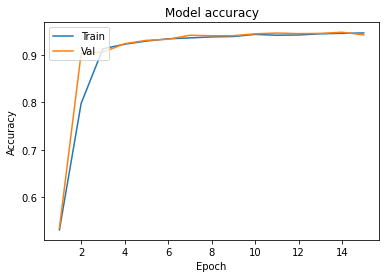

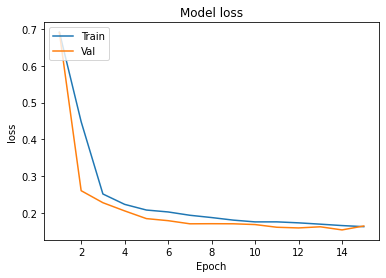

In [42]:
plot_learningCurve(history,15)

In [43]:
img_path=r"C:/Users/TUSHAR/malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.


In [44]:
for j in range(0,1):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[6].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = 6).name)
  plt.figure(figsize=(20,20))
  print(activation)

dropout_4
tf.Tensor(
[[[[0.00000000e+00 1.73097938e-01 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    1.42828673e-01 0.00000000e+00 2.42827386e-02 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 8.71535391e-04 8.38693678e-02]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
    0.00000000e+00 8.27272311e-02 3.28058600e-02 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.74564379e-01
    0.00000000e+00 3.89788836e-01 3.24811250e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 7.63673261e-02 3.86379093e-01
    0.0000

<Figure size 1440x1440 with 0 Axes>

conv2d_6


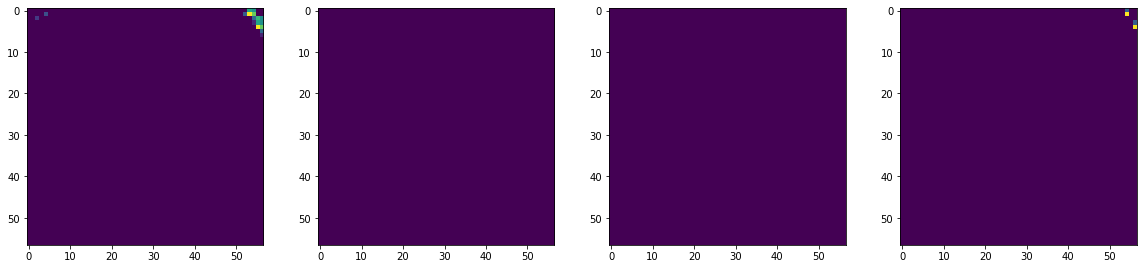

max_pooling2d_6


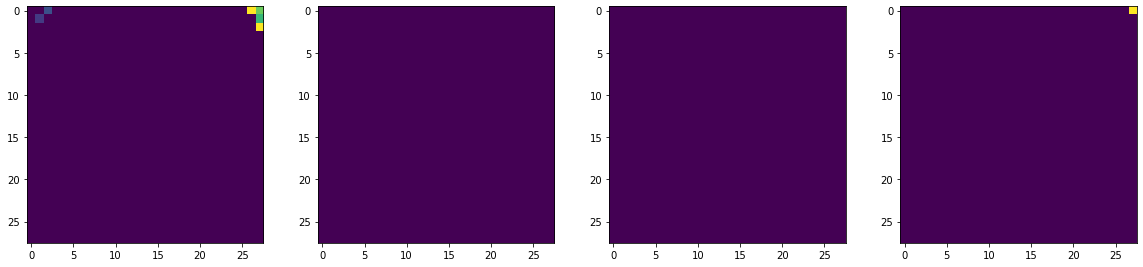

conv2d_7


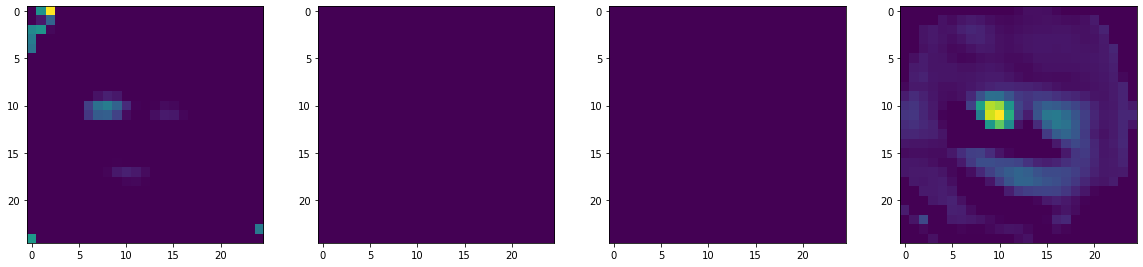

max_pooling2d_7


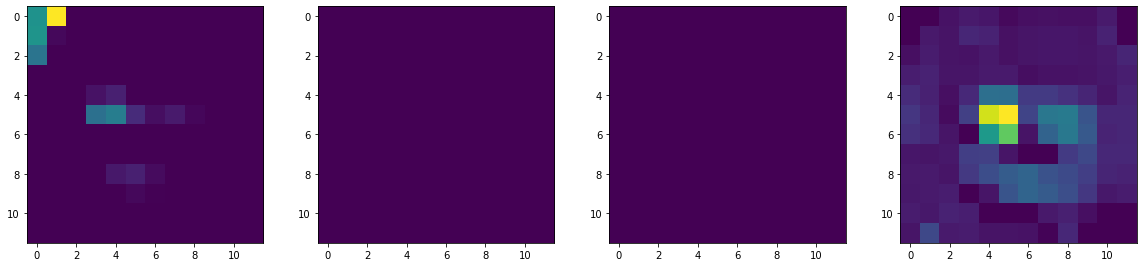

conv2d_8


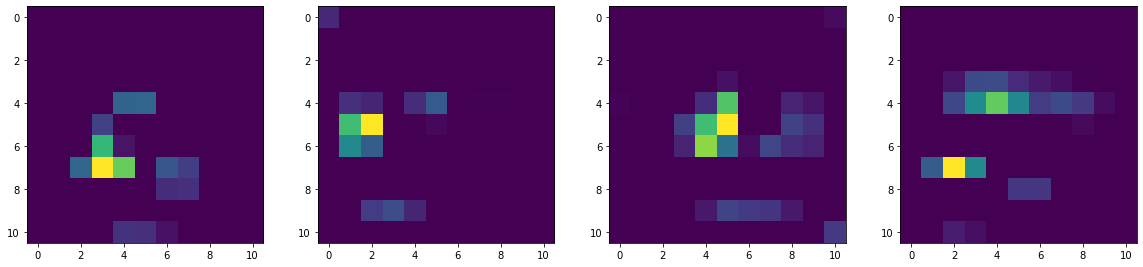

max_pooling2d_8


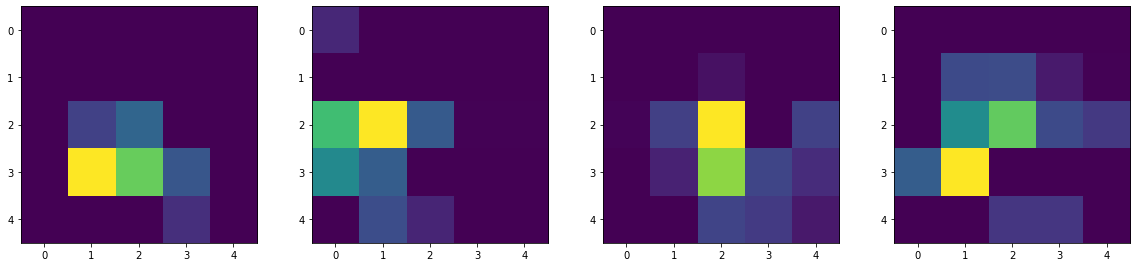

dropout_4


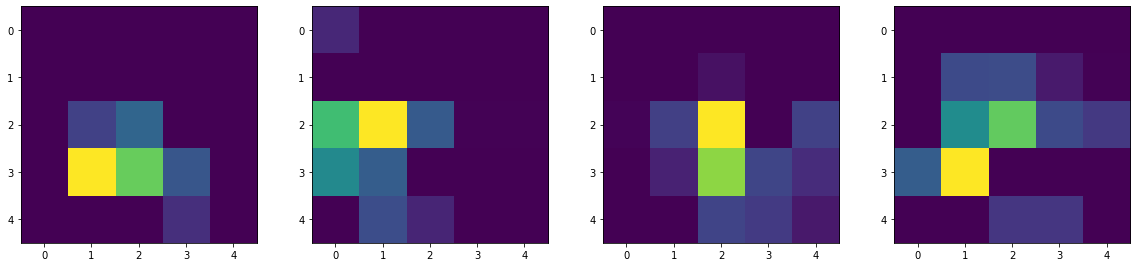

In [45]:
for j in range(0,7):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))

  for i in range(4):
      plt.subplot(4,4,i+1)

      plt.imshow(activation[0,:,:,i])
  plt.show()

In [46]:
for j in range(7,11):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))
  print(activation)

flatten_2
tf.Tensor(
[[0.00000000e+00 1.73097938e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.42828673e-01 0.00000000e+00 2.42827386e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 8.71535391e-04 8.38693678e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.27272311e-02 3.28058600e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.74564379e-01
  0.00000000e+00 3.89788836e-01 3.24811250e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 7.63673261e-02 3.86379093e-01
  0.00000000e+00 4.23981518e-01 4.01746988e-01 0.

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

1/1 [==============================] - 0s 94ms/step


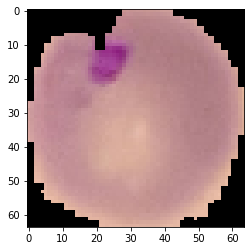

In [47]:
image_path="C:/Users/TUSHAR/Desktop/malaria/predict/C33P1thinF_IMG_20150619_121229a_cell_179.png"
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
predictions = (model.predict(img) > 0.5).astype("int32")
plt.show()

conv2d_6


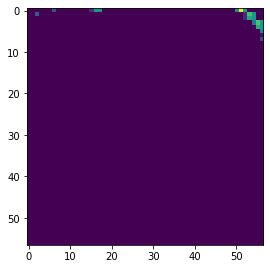

max_pooling2d_6


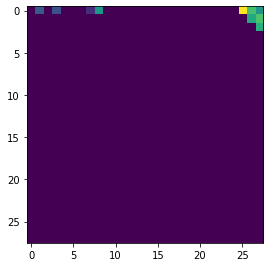

conv2d_7


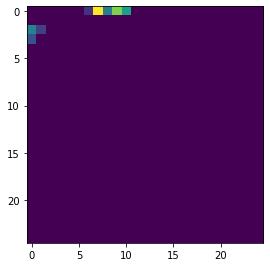

max_pooling2d_7


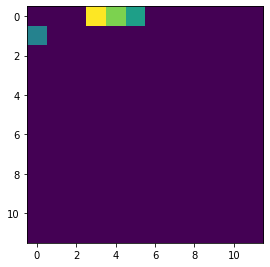

conv2d_8


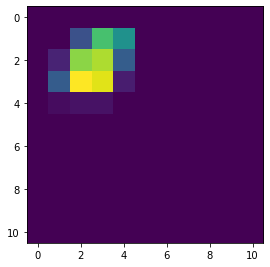

max_pooling2d_8


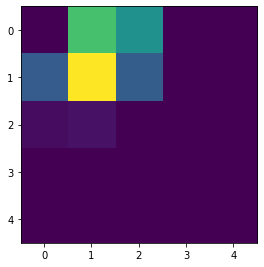

dropout_4


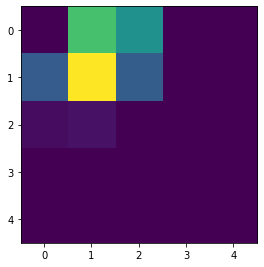

flatten_2
tf.Tensor(
[[0.0000000e+00 9.0227705e-01 0.0000000e+00 0.0000000e+00 6.0526860e-01
  0.0000000e+00 4.6969029e-01 0.0000000e+00 1.3559458e+00 3.8040468e-01
  7.4341819e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 9.6592939e-01 0.0000000e+00 1.9751290e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.9864625e+00 2.6046479e+00 0.0000000e+00
  0.0000000e+00 3.7294179e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  6.4349723e-01 7.7231795e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  5.5298197e-01 1.7900065e-01 0.0000000e+00 1.1781672e+00 2.1677678e+00
  0.0000000e+00 9.2229402e-01 0.0000000e+00 1.9107491e+00 0.0000000e+00
  0.0000000e+00 2.8925914e-01 1.5274003e+00 3.9391136e-01 6.0354245e-01
  6.9705880e-01 5.6158614e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.3158020e-01 2.6073584e-01 1.8329811e+00 2.1710427e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [48]:
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# for j in range(0,1):
#   activation_model = Model(inputs=model.inputs, outputs=model.layers[6].output)
#   activation = activation_model(img_tensor)
#   print(model.get_layer(index = 6).name)
#   plt.figure(figsize=(20,20))
#   print(activation)
for j in range(0,7):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))

  for i in range(1):
      plt.subplot(4,4,i+1)

      plt.imshow(activation[0,:,:,i])
  plt.show()
for j in range(7,11):
  activation_model = Model(inputs=model.inputs, outputs=model.layers[j].output)
  activation = activation_model(img_tensor)
  print(model.get_layer(index = j).name)
  plt.figure(figsize=(20,20))
  print(activation)
if(predictions[0]==1):
  print(" -------------Uninfected-------------")
else :
  print("-------------Parasitized-------------")